# Handwritten Digits Recognition using Neural networks and CNN

#### Developed by:- Priyanshu Jyoti Khound(20BT04041) and Ronak Panchal(20BT04029)

## Artificial Neural Network

Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.

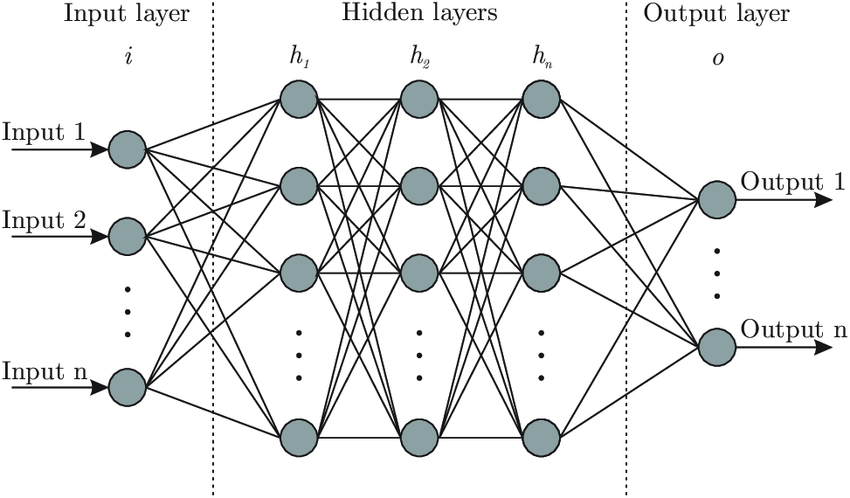

Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.


Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

### Importing Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
import seaborn as sns

### Loading Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Shape of Training Dataset: ",x_train.shape)
print("Shape of Testing Dataset: ",x_test.shape)

Shape of Training Dataset:  (60000, 28, 28)
Shape of Testing Dataset:  (10000, 28, 28)


### Visualizing Training Set

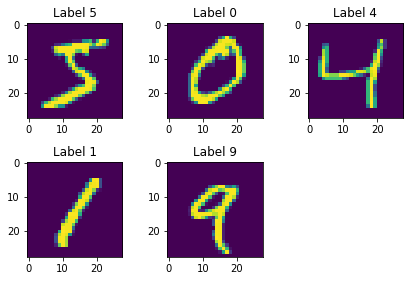

In [5]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i])
    plt.title("Label {}".format(y_train[i]))
plt.tight_layout()

### Preprocessing and Model Building

#### Normalizing Dataset 

The purpose of normalization is to transform data in a way that they are either dimensionless and/or have similar distributions. This process of normalization is known by other names such as standardization, feature scaling etc. Normalization is an essential step in data pre-processing in any machine learning application and model fitting.

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

#### Model Building

The Keras sequential class helps to form a cluster of a layer that is linearly stacked into tf.keras.Model. The features of training and inference are provided by sequential to this model.

Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.

output = activation(dot(input, kernel) + bias)    where,

-input represent the input data
-kernel represent the weight data
-dot represent numpy dot product of all input and its corresponding weights
-bias represent a biased value used in machine learning to optimize the model
-activation represent the activation function.

In the context of artificial neural networks, the rectifier or ReLU (Rectified Linear Unit) activation function is an activation function defined as the positive part of its argument.

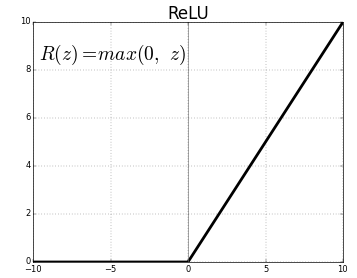

The softmax function, also known as softargmax 184  or normalized exponential function,is a generalization of the logistic function to multiple dimensions. It is used in multinomial logistic regression and is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes, based on Luce's choice axiom.

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(64, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

Adaptive Moment Estimation(adam) is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters. It requires less memory and is efficient. 

SparceCategoricalCrossentropy computes the crossentropy loss between the labels and predictions.Use SparceCategoricalCrossentropy loss function when there are two or more label classes. We expect labels to be provided as integers.

In [8]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist=model.fit(x_train, y_train, batch_size = 128, epochs = 30, verbose = 1)

Epoch 1/30
469/469 [==============================] - 3s 4ms/step - loss: 1.6325 - accuracy: 0.8500
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 1.5180 - accuracy: 0.9482
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 1.5049 - accuracy: 0.9593
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 1.4965 - accuracy: 0.9675
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 1.4916 - accuracy: 0.9717
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 1.4871 - accuracy: 0.9762
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 1.4841 - accuracy: 0.9791
Epoch 8/30
469/469 [==============================] - 1s 3ms/step - loss: 1.4816 - accuracy: 0.9811
Epoch 9/30
469/469 [==============================] - 1s 3ms/step - loss: 1.4796 - accuracy: 0.9830
Epoch 10/30
469/469 [==============================] - 1s 3ms/step - loss: 1.4784 - accuracy: 0.9841

### Evaluating Testing Dataset

In [11]:
score = model.evaluate(x_test,y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 1.4839 - accuracy: 0.9773
Test score:  1.4839264154434204
Test accuracy:  0.9772999882698059


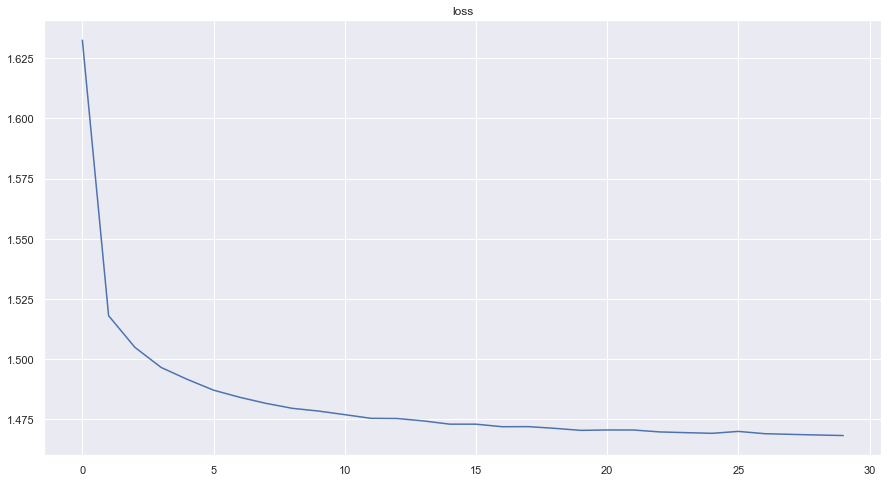

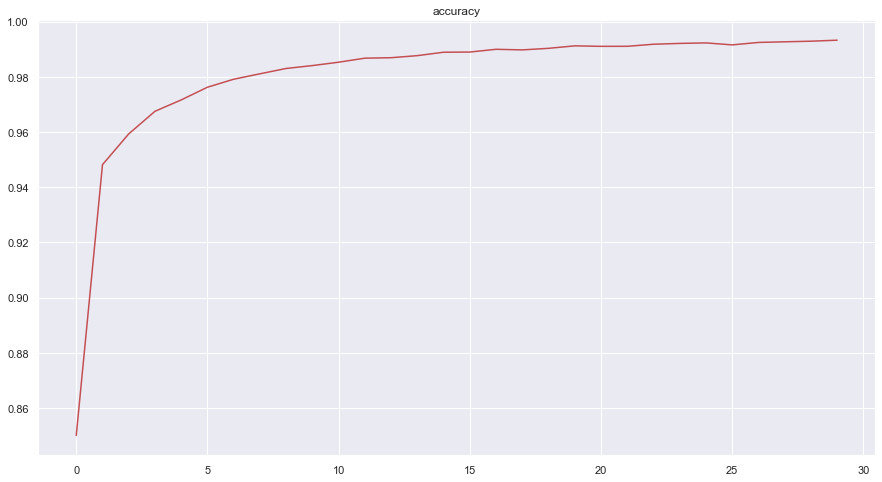

In [39]:
plt.plot(hist.history['loss'], color='b')
plt.title("loss")
plt.show()
plt.plot(hist.history['accuracy'], color='r')
plt.title("accuracy")
plt.show()

<AxesSubplot:>

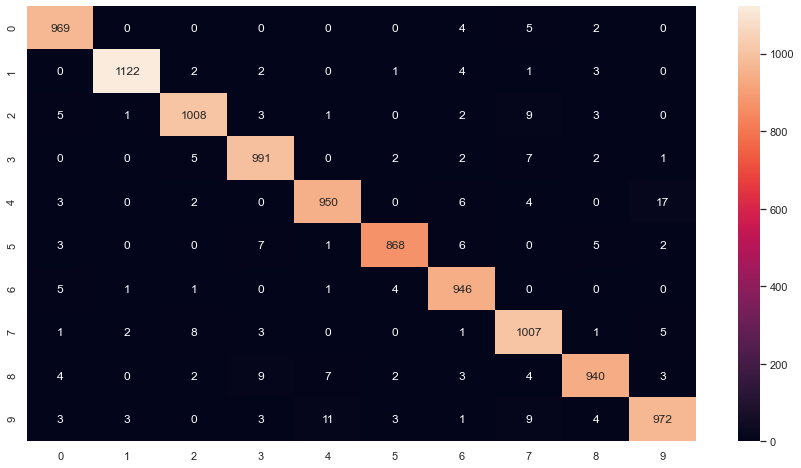

In [14]:
from sklearn.metrics import confusion_matrix
sns.set(rc = {'figure.figsize':(15,8)})
y_hat = model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
#y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')

## Convolutional Neural Networks

Convolutional neural networks are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. They have three main types of layers, which are:

-Convolutional layer

-Pooling layer

-Fully-connected (FC) layer

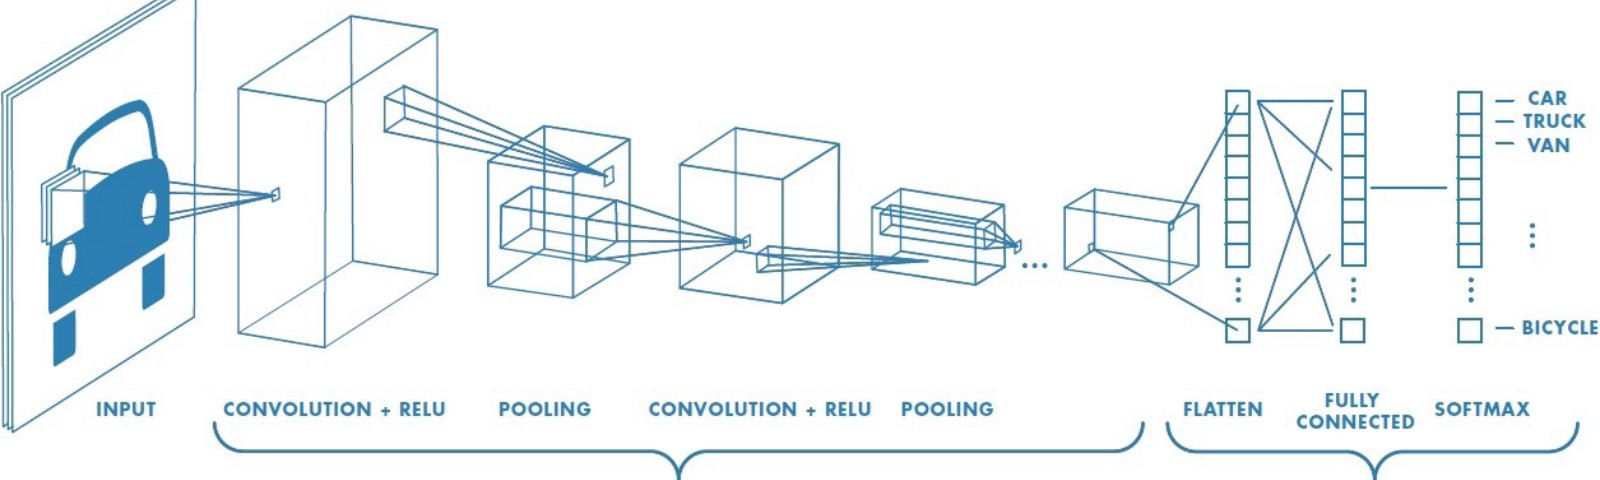

The convolutional layer is the core building block of a CNN, and it is where the majority of computation occurs. It requires a few components, which are input data, a filter, and a feature map. A feature detector, also known as a kernel or a filter, will move across the receptive fields of the image, checking if the feature is present. This process is known as a convolution.

The feature detector is a two-dimensional (2-D) array of weights, which represents part of the image. While they can vary in size, the filter size is typically a 3x3 matrix; this also determines the size of the receptive field. The filter is then applied to an area of the image, and a dot product is calculated between the input pixels and the filter. This dot product is then fed into an output array. Afterwards, the filter shifts by a stride, repeating the process until the kernel has swept across the entire image. The final output from the series of dot products from the input and the filter is known as a feature map, activation map, or a convolved feature.

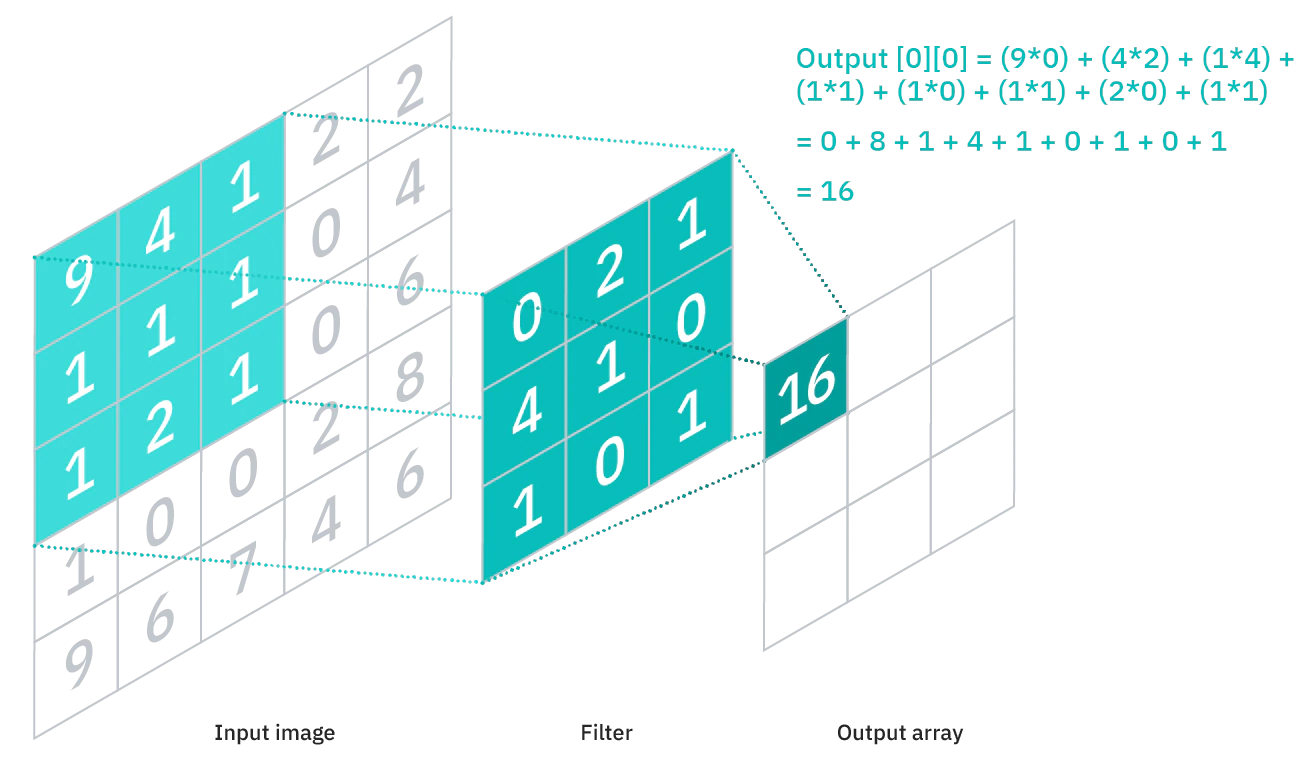

Pooling layers, also known as downsampling, conducts dimensionality reduction, reducing the number of parameters in the input. In Max pooling the filter moves across the input, it selects the pixel with the maximum value to send to the output array. 

The pixel values of the input image are not directly connected to the output layer in partially connected layers. However, in the fully-connected layer, each node in the output layer connects directly to a node in the previous layer.
This layer performs the task of classification based on the features extracted through the previous layers and their different filters. While convolutional and pooling layers tend to use ReLu functions, FC layers usually leverage a softmax activation function to classify inputs appropriately, producing a probability from 0 to 1.

### Loading Dataset

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print("training dataset shape: ", x_train.shape)
print("testing dataset shape: ", x_test.shape)

training dataset shape:  (60000, 28, 28)
testing dataset shape:  (10000, 28, 28)


### Normalizing Dataset 

In [29]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [30]:
x_train = x_train / 255
x_test = x_test / 255

#### CNN Model Building

In [31]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [32]:
cnn_model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

In [33]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)               

In [34]:
cnn_hist=cnn_model.fit(x_train, y_train, batch_size = 128, epochs = 30, verbose = 1)

Epoch 1/30


C:\Users\hiren\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


469/469 [==============================] - 21s 45ms/step - loss: 0.3672 - accuracy: 0.8927
Epoch 2/30
469/469 [==============================] - 21s 44ms/step - loss: 0.1123 - accuracy: 0.9647
Epoch 3/30
469/469 [==============================] - 21s 44ms/step - loss: 0.0821 - accuracy: 0.9739
Epoch 4/30
469/469 [==============================] - 21s 45ms/step - loss: 0.0653 - accuracy: 0.9799
Epoch 5/30
469/469 [==============================] - 21s 45ms/step - loss: 0.0566 - accuracy: 0.9821
Epoch 6/30
469/469 [==============================] - 21s 44ms/step - loss: 0.0486 - accuracy: 0.9846
Epoch 7/30
469/469 [==============================] - 21s 44ms/step - loss: 0.0410 - accuracy: 0.9870
Epoch 8/30
469/469 [==============================] - 22s 46ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 9/30
469/469 [==============================] - 21s 45ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 10/30
469/469 [==============================] - 21s 45ms/step - loss: 0.0311 - accurac

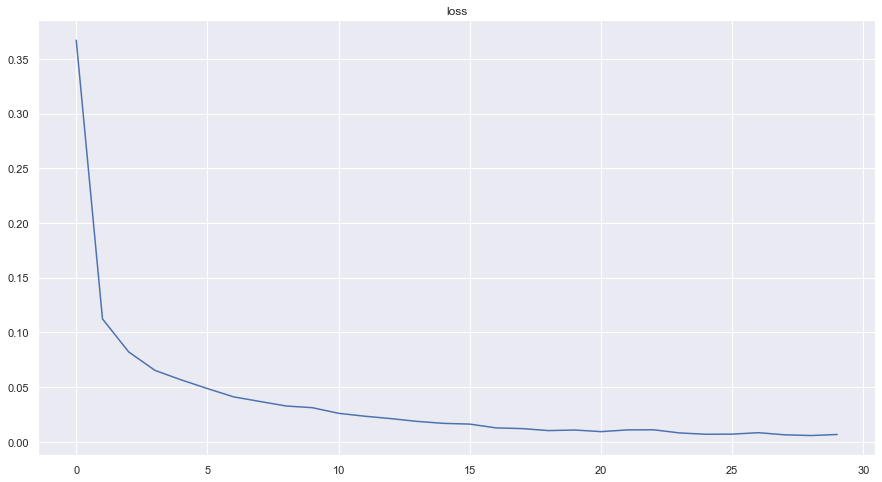

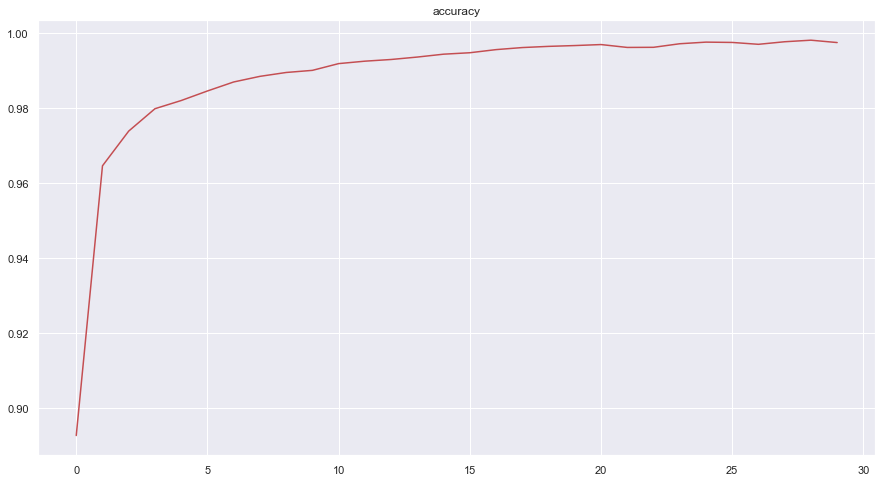

In [36]:
plt.plot(cnn_hist.history['loss'], color='b')
plt.title("loss")
plt.show()
plt.plot(cnn_hist.history['accuracy'], color='r')
plt.title("accuracy")
plt.show()

#### Evaluating Test Dataset

In [37]:
score = cnn_model.evaluate(x_test,y_test)
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9851
Test score:  0.07481902092695236
Test accuracy:  0.9850999712944031


<AxesSubplot:>

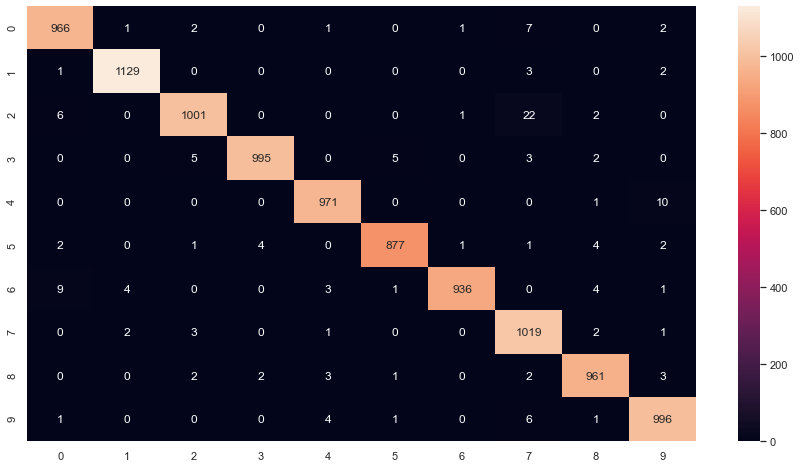

In [38]:
sns.set(rc = {'figure.figsize':(15,8)})
y_hat = cnn_model.predict(x_test)
y_pred = np.argmax(y_hat, axis=1)
#y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')